In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [ ]:
# Set up paths for your data
lesion_dir = '/content/drive/MyDrive/png-images'
healthy_dir = '/content/drive/MyDrive/new'

# Check if directories exist
assert os.path.exists(lesion_dir), "Lesion data directory does not exist!"
assert os.path.exists(healthy_dir), "Healthy data directory does not exist!"

In [ ]:
# Use reduced variability in augmentation to introduce some randomness
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  # Reduced rotation range
    width_shift_range=0.1,  # Reduced width shift
    height_shift_range=0.1,  # Reduced height shift
    shear_range=0.1,  # Reduced shear
    zoom_range=0.1,  # Reduced zoom
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% validation
)

# Training and validation data generators
train_generator = datagen.flow_from_directory(
    directory='/content/drive/MyDrive',
    classes=['png-images', 'new'],
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    directory='/content/drive/MyDrive',
    classes=['png-images', 'new'],
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    subset='validation'
)

Found 808 images belonging to 2 classes.
Found 202 images belonging to 2 classes.


In [ ]:
# Build a simplified CNN model with increased dropout
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # Further reduced filters
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),  # Further reduced filters
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),  # Further reduced dense layer size
    Dropout(0.8),  # Increased dropout to 80%
    Dense(1, activation='sigmoid')  # Binary classification (tumor vs. healthy)
])

In [ ]:

# Compile the model with a higher learning rate
model.compile(optimizer=Adam(learning_rate=0.01),  # Higher learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,  # Fewer epochs to reduce overfitting
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 297s 5s/step - accuracy: 0.5237 - loss: 1.4135 - val_accuracy: 0.5208 - val_loss: 0.6929
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 544ms/step - accuracy: 0.3125 - loss: 0.6947 - val_accuracy: 0.4000 - val_loss: 0.6948
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 342s 5s/step - accuracy: 0.5093 - loss: 0.6920 - val_accuracy: 0.4896 - val_loss: 0.6932
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5625 - loss: 0.6906 - val_accuracy: 0.6000 - val_loss: 0.6923
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 319s 5s/step - accuracy: 0.4770 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6926


In [ ]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 56s 4s/step - accuracy: 0.4960 - loss: 0.6928
Validation Accuracy: 50.50%


In [ ]:
model_save_path = '/content/drive/MyDrive/mammography_classification_model.h5'
model.save(model_save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


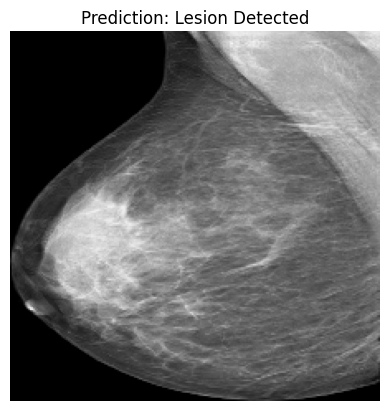

Prediction result: Lesion Detected


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

# Load the trained model
model_path = '/content/drive/MyDrive/mammography_classification_model.h5'
model = load_model(model_path)

def predict_image(image_path):
    # Load the image
    img = load_img(image_path, target_size=(224, 224))  # Resize the image to match the input shape of the model
    img_array = img_to_array(img)  # Convert the image to an array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the model's input
    img_array /= 255.0  # Rescale the image as done during training

    # Make a prediction
    prediction = model.predict(img_array)[0][0]

    # Interpret the result
    if prediction < 0.5:
        label = 'Lesion Detected'
    else:
        label = 'Healthy Image'

    # Display the image with the prediction result
    plt.imshow(img)
    plt.title(f"Prediction: {label}")
    plt.axis('off')
    plt.show()

    return label

# Test the function with an image path
image_path = '/content/test_image.jpg'  # Replace with the path to your test image
result = predict_image(image_path)
print(f"Prediction result: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


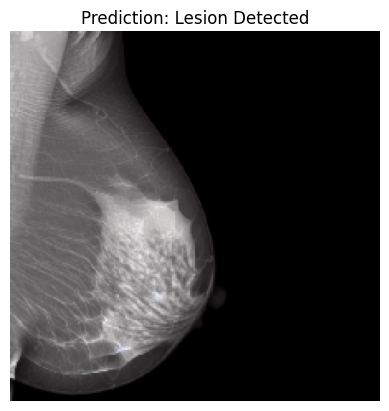

Prediction result: Lesion Detected


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

# Load the trained model
model_path = '/content/drive/MyDrive/mammography_classification_model.h5'
model = load_model(model_path)

def predict_image(image_path):
    # Load the image
    img = load_img(image_path, target_size=(224, 224))  # Resize the image to match the input shape of the model
    img_array = img_to_array(img)  # Convert the image to an array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the model's input
    img_array /= 255.0  # Rescale the image as done during training

    # Make a prediction
    prediction = model.predict(img_array)[0][0]

    # Interpret the result
    if prediction < 0.5:
        label = 'Lesion Detected'
    else:
        label = 'Healthy Image'

    # Display the image with the prediction result
    plt.imshow(img)
    plt.title(f"Prediction: {label}")
    plt.axis('off')
    plt.show()

    return label

# Test the function with an image path
image_path = '/content/hlthy.jpg'  # Replace with the path to your test image
result = predict_image(image_path)
print(f"Prediction result: {result}")
